# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100, 150, 200, 250, 300, 350]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

S-curve, perplexity=4 in 1.7 sec
S-curve, perplexity=6 in 2 sec
S-curve, perplexity=9 in 2 sec
S-curve, perplexity=14 in 2.2 sec
S-curve, perplexity=21 in 2.7 sec
S-curve, perplexity=30 in 3.1 sec
S-curve, perplexity=45 in 4 sec
S-curve, perplexity=66 in 4.3 sec
S-curve, perplexity=100 in 4.4 sec
S-curve, perplexity=150 in 4.7 sec
S-curve, perplexity=200 in 6.2 sec
S-curve, perplexity=250 in 6 sec
S-curve, perplexity=300 in 2.5 sec
S-curve, perplexity=350 in 2.5 sec


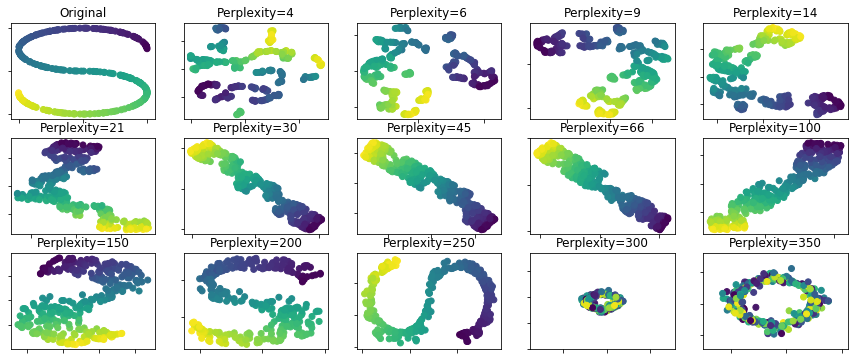

In [3]:
# 繪製不同 perplexity 下的 t-SNE 分群圖 (請注意! 語法也要對應調整)
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 6))

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    i = i + 1
    ax = subplots[i // 5][i % 5]
#     if i<4:
#         ax = subplots[0][i+1]
#     else:
#         ax = subplots[(i // 5)][i % 5]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

* Perplexity 越低圖形越散亂，越高分群效果越好。
* 當 Perplexity 越靠近 200 的時候最靠近原始形狀，但是隨著數值逐漸再度增大，圖形又變得散亂並且失去分群效果。